# Feature Engineering

Goal: Prepare the final dataset with features used for regression.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import lego_helper as lh

## Import Data

In [4]:
FINAL_FILE = 'data/brickset_final.csv'

In [5]:
set_df = pd.read_csv(FINAL_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,price_store,price_new,price_used,rating_value,rating_votes,number_parts,total_parts,number_colors,1st_color,2nd_color
0,1591-1,Danone Delivery Truck,Modern day,Town,Special,1980.0,40.0,0.0,NaN,129.0,28.0,NaN,NaN,19,40,4,White,Blue
1,1592-1,Town Square - Castle Scene,Modern day,Town,Classic,1980.0,471.0,11.0,NaN,1168.0,235.0,4.8,4.0,133,495,10,Black,Yellow
2,1651-2,Maersk Line Container Lorry,Modern day,Town,Special,1980.0,305.0,1.0,NaN,NaN,444.0,5.0,1.0,66,305,9,Maersk Blue,Light Gray
3,6305-1,Trees and Flowers,Modern day,Town,Accessories,1980.0,12.0,0.0,3.75,28.0,10.0,4.3,4.0,6,24,4,Green,Red
4,6306-1,Road Signs,Modern day,Town,Accessories,1980.0,12.0,0.0,2.50,49.0,13.0,4.0,3.0,10,12,1,White,White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 18 columns):
set_no           3213 non-null object
name             3213 non-null object
theme_group      3213 non-null object
theme            3213 non-null object
subtheme         2667 non-null object
year             3213 non-null float64
piece_cnt        3212 non-null float64
minifig_cnt      3213 non-null float64
price_store      2762 non-null float64
price_new        3098 non-null float64
price_used       3140 non-null float64
rating_value     3001 non-null float64
rating_votes     3001 non-null float64
number_parts     3213 non-null int64
total_parts      3213 non-null int64
number_colors    3213 non-null int64
1st_color        3213 non-null object
2nd_color        3213 non-null object
dtypes: float64(8), int64(3), object(7)
memory usage: 451.9+ KB


## Investigate Surviving Sets

In [6]:
set_df['theme_group'].value_counts()

Modern day          1027
Licensed             816
Action/Adventure     594
Historical           337
Model making         279
Racing               160
Name: theme_group, dtype: int64

In [7]:
# there are too many themes, use the groups instead

set_df['theme'].value_counts().shape

(70,)

In [8]:
InteractiveShell.ast_node_interactivity = 'last'

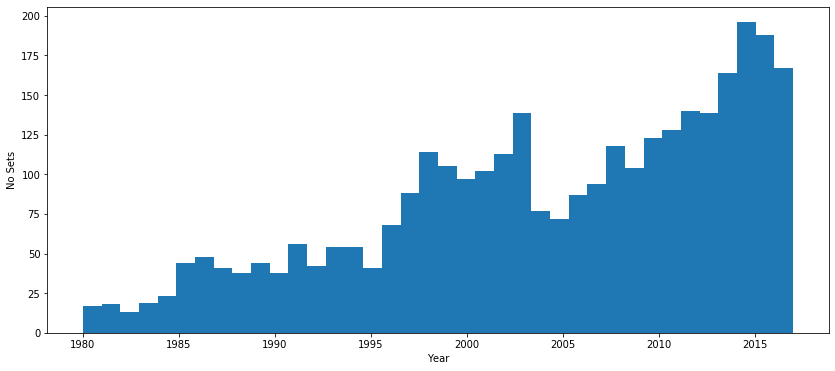

In [9]:
# sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

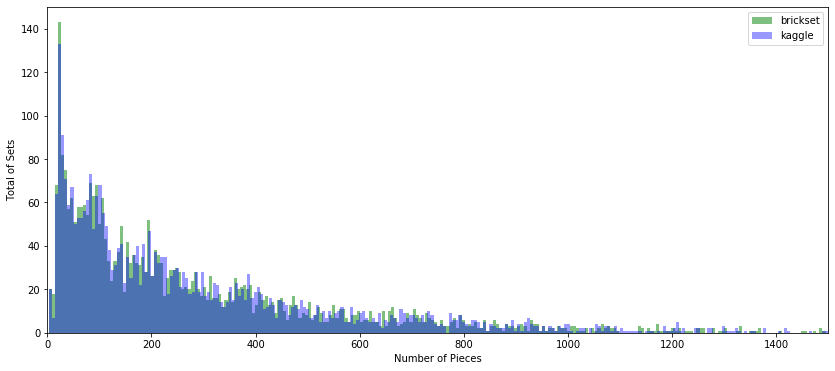

In [10]:
# piece count distribution brickset vs kaggle

piece_df = set_df.loc[(set_df['piece_cnt']>=1) & (set_df['total_parts']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Number of Pieces', ylabel='Total of Sets', xlim=(0, 1500))

axs.hist(piece_df['piece_cnt'].values, bins=1000, color='green', label='brickset', alpha=.5)
axs.hist(piece_df['total_parts'].values, bins=1000, color='blue', label='kaggle', alpha=.4)

plt.legend()
plt.show()

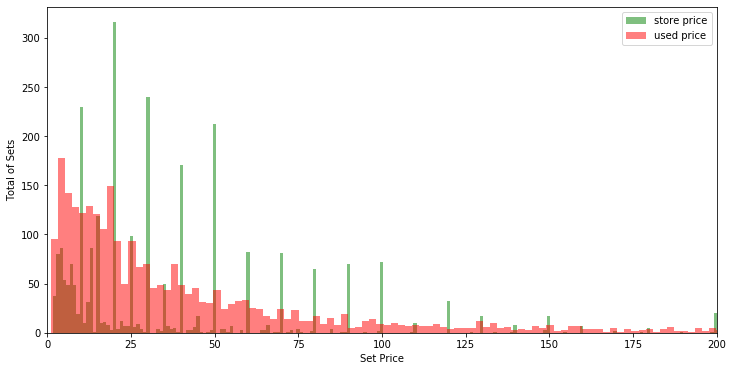

In [11]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(12, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

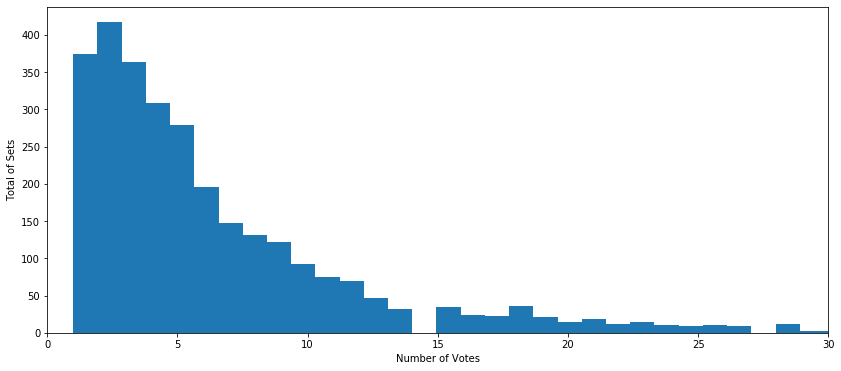

In [12]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

votes_df = set_df.loc[set_df['rating_votes'].isna()==False]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(votes_df['rating_votes'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

## Introduce New Features

In [13]:
# create a popularity column, new feature for ratings

set_df['popularity'] = set_df['rating_value'] * set_df['rating_votes']
set_df['popularity'].head()

0     NaN
1    19.2
2     5.0
3    17.2
4    12.0
Name: popularity, dtype: float64

In [14]:
# visualize the popularity

popularity_df = set_df.loc[set_df['popularity'].isna()==False]
popularity_df.shape

(3001, 19)

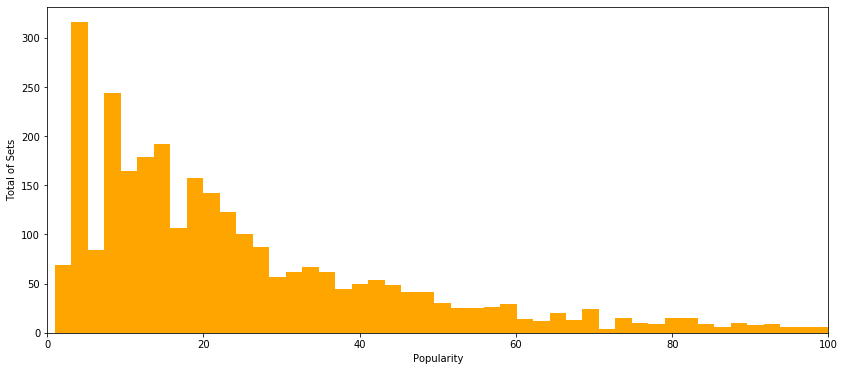

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

axs.hist(popularity_df['popularity'].values, bins=200, color='orange')
axs.set(xlabel='Popularity', ylabel='Total of Sets', xlim=(0, 100))  

plt.show()

In [16]:
# check colors that are being used in sets

set_df['1st_color'].value_counts()

Black                  1219
White                   569
Light Bluish Gray       347
Red                     188
Light Gray              174
Dark Bluish Gray        162
Yellow                  130
Blue                     87
Reddish Brown            79
Tan                      69
Dark Gray                36
Green                    26
Brown                    21
Dark Red                 12
Pearl Gold               10
Orange                   10
Lime                     10
Dark Blue                 9
Medium Blue               6
Dark Purple               5
Dark Green                5
Olive Green               3
Dark Tan                  3
Chrome Gold               3
Medium Azure              3
Dark Orange               3
Maersk Blue               2
Bright Light Orange       2
Trans-Neon Orange         2
Dark Pink                 2
Medium Dark Flesh         2
Dark Azure                2
Trans-Neon Green          2
Sand Blue                 1
Light Flesh               1
Trans-Dark Blue     

In [17]:
# create new columns for super-colors 

set_df['scolor_1st'] = set_df['1st_color'].apply(lh.get_super_color)
set_df['scolor_2nd'] = set_df['2nd_color'].apply(lh.get_super_color)
set_df[['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd']].head()

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
0,1591-1,Danone Delivery Truck,Town,White,White,Blue,Blue
1,1592-1,Town Square - Castle Scene,Town,Black,Black,Yellow,Yellow
2,1651-2,Maersk Line Container Lorry,Town,Maersk Blue,Blue,Light Gray,Gray
3,6305-1,Trees and Flowers,Town,Green,Green,Red,Red
4,6306-1,Road Signs,Town,White,White,White,White


In [18]:
# check for any remaining gaps

set_df.loc[ (set_df['scolor_1st'].isna()) | (set_df['scolor_2nd'].isna()), 
            ['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd'] ]

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
1304,3560-1,NBA Collectors # 1,Sports,Tan,Tan,[No Color],None
1306,3562-1,NBA Collectors # 3,Sports,Tan,Tan,[No Color],None
1309,3565-1,NBA Collectors # 6,Sports,Tan,Tan,[No Color],None
1310,3566-1,NBA Collectors # 7,Sports,Tan,Tan,[No Color],None


In [19]:
# fix secondary colors by assigning primary color

set_df['scolor_2nd'] = set_df['scolor_2nd'].fillna(set_df['scolor_1st'])
set_df.loc[(set_df['scolor_2nd'].isna())]

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,price_store,price_new,...,rating_value,rating_votes,number_parts,total_parts,number_colors,1st_color,2nd_color,popularity,scolor_1st,scolor_2nd


In [20]:
set_df['scolor_1st'].value_counts()

Black          1219
Gray            720
White           569
Red             203
Yellow          158
Blue            116
Brown           101
Tan              75
Green            46
Transparent       6
Name: scolor_1st, dtype: int64

## Clean Features Dataset

In [21]:
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 21 columns):
set_no           3213 non-null object
name             3213 non-null object
theme_group      3213 non-null object
theme            3213 non-null object
subtheme         2667 non-null object
year             3213 non-null float64
piece_cnt        3212 non-null float64
minifig_cnt      3213 non-null float64
price_store      2762 non-null float64
price_new        3098 non-null float64
price_used       3140 non-null float64
rating_value     3001 non-null float64
rating_votes     3001 non-null float64
number_parts     3213 non-null int64
total_parts      3213 non-null int64
number_colors    3213 non-null int64
1st_color        3213 non-null object
2nd_color        3213 non-null object
popularity       3001 non-null float64
scolor_1st       3213 non-null object
scolor_2nd       3213 non-null object
dtypes: float64(9), int64(3), object(9)
memory usage: 527.2+ KB


In [22]:
set_clean_df = set_df[['set_no', 'name', 
                       'price_store', 'price_used', 'popularity', 
                       'theme_group', 'year', 'total_parts', 'number_parts', 
                       'number_colors', 'scolor_1st', 'scolor_2nd']]
set_clean_df = set_clean_df.rename(columns={'theme_group': 'group'})
set_clean_df.head()

,set_no,name,price_store,price_used,popularity,group,year,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
0,1591-1,Danone Delivery Truck,NaN,28.0,NaN,Modern day,1980.0,40,19,4,White,Blue
1,1592-1,Town Square - Castle Scene,NaN,235.0,19.2,Modern day,1980.0,495,133,10,Black,Yellow
2,1651-2,Maersk Line Container Lorry,NaN,444.0,5.0,Modern day,1980.0,305,66,9,Blue,Gray
3,6305-1,Trees and Flowers,3.75,10.0,17.2,Modern day,1980.0,24,6,4,Green,Red
4,6306-1,Road Signs,2.50,13.0,12.0,Modern day,1980.0,12,10,1,White,White


In [23]:
set_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 12 columns):
set_no           3213 non-null object
name             3213 non-null object
price_store      2762 non-null float64
price_used       3140 non-null float64
popularity       3001 non-null float64
group            3213 non-null object
year             3213 non-null float64
total_parts      3213 non-null int64
number_parts     3213 non-null int64
number_colors    3213 non-null int64
scolor_1st       3213 non-null object
scolor_2nd       3213 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 301.3+ KB


In [24]:
save_path = r'data/brickset_features.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'0.26 mb'